In [1]:
%matplotlib widget

In [2]:
%cd ..

d:\Users\NitroPC\Documents\Python\ConcursoModelizacion2023


In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl

from gradient_descent import Environment, Agent, ConstrainedLoss, CostLoss, DistanceLoss
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from utils import plot_location

In [4]:
def optimize(env, agent, loss, loss2, optim, scheduler=None, iters=10000, verbose=True):
    losses_1, losses_2 = [], []
    params = []
    
    for i in range(iters):
        f = agent()
        p, v = env(f)
        l = loss(f, p, v)

        optim.zero_grad()
        l.backward(retain_graph=True)

        torch.nn.utils.clip_grad_norm_(agent.parameters(), 10.)
        optim.step()

        if scheduler is not None:
            scheduler.step()

        if verbose and i%10==0:
            l1 = l.item()
            losses_1 += [l1]
            losses_2 += [loss2(f, p, v).item()]
            params += [f.detach().clone().numpy()]

            print(l1, scheduler.get_last_lr())
            
    return losses_1, losses_2, params

In [5]:
K=35
dt = 1.
g = 0.1
m = 10.
F_max = 11.
p_0 = np.array([50., 50., 100.])
v_0 = np.array([-10., 0., -10.])
alpha = 0.5
gamma = 1.

In [6]:
agent = Agent(K)
env = Environment(dt, gamma, g, m, p_0, v_0)

In [7]:
loss = ConstrainedLoss(dt, gamma, F_max, alpha)
loss2 = CostLoss(dt, gamma)
optim = torch.optim.RMSprop(agent.parameters(), lr=1e-0)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optim, gamma=0.99)

In [8]:
%%time
losses_1, losses_2, params = optimize(env, agent, loss, loss2, optim, scheduler, iters=1000)

194715.859375 [0.99]
1666.57373046875 [0.8953382542587163]
1428.5897216796875 [0.8097278682212583]
3689.371337890625 [0.7323033696543974]
797.4444580078125 [0.6622820409839835]
3370.52490234375 [0.5989560064661611]
667.7352294921875 [0.5416850759668536]
570.9507446289062 [0.4898902730042049]
1776.882568359375 [0.44304798162617254]
411.0437316894531 [0.40068465295154065]
381.4420166015625 [0.36237201786049694]
2922.66259765625 [0.3277227574378037]
500.4258728027344 [0.2963865873992079]
327.7358703613281 [0.26804671691687404]
361.5463562011719 [0.24241664604458016]
905.7007446289062 [0.21923726936647234]
287.010009765625 [0.19827425658891445]
293.99005126953125 [0.17931568359471056]
263.4123229980469 [0.16216989001100657]
276.1782531738281 [0.1466635416321037]
255.123291015625 [0.13263987810938213]
253.47862243652344 [0.11995712819347792]
243.25511169433594 [0.10848707650771475]
244.01112365722656 [0.09811376736368599]
239.84205627441406 [0.08873233251530144]
332.8196716308594 [0.0802479

In [9]:
f = agent()
p, v = env(f)

In [10]:
loss(f, p, v)

tensor(191.0959, grad_fn=<AddBackward0>)

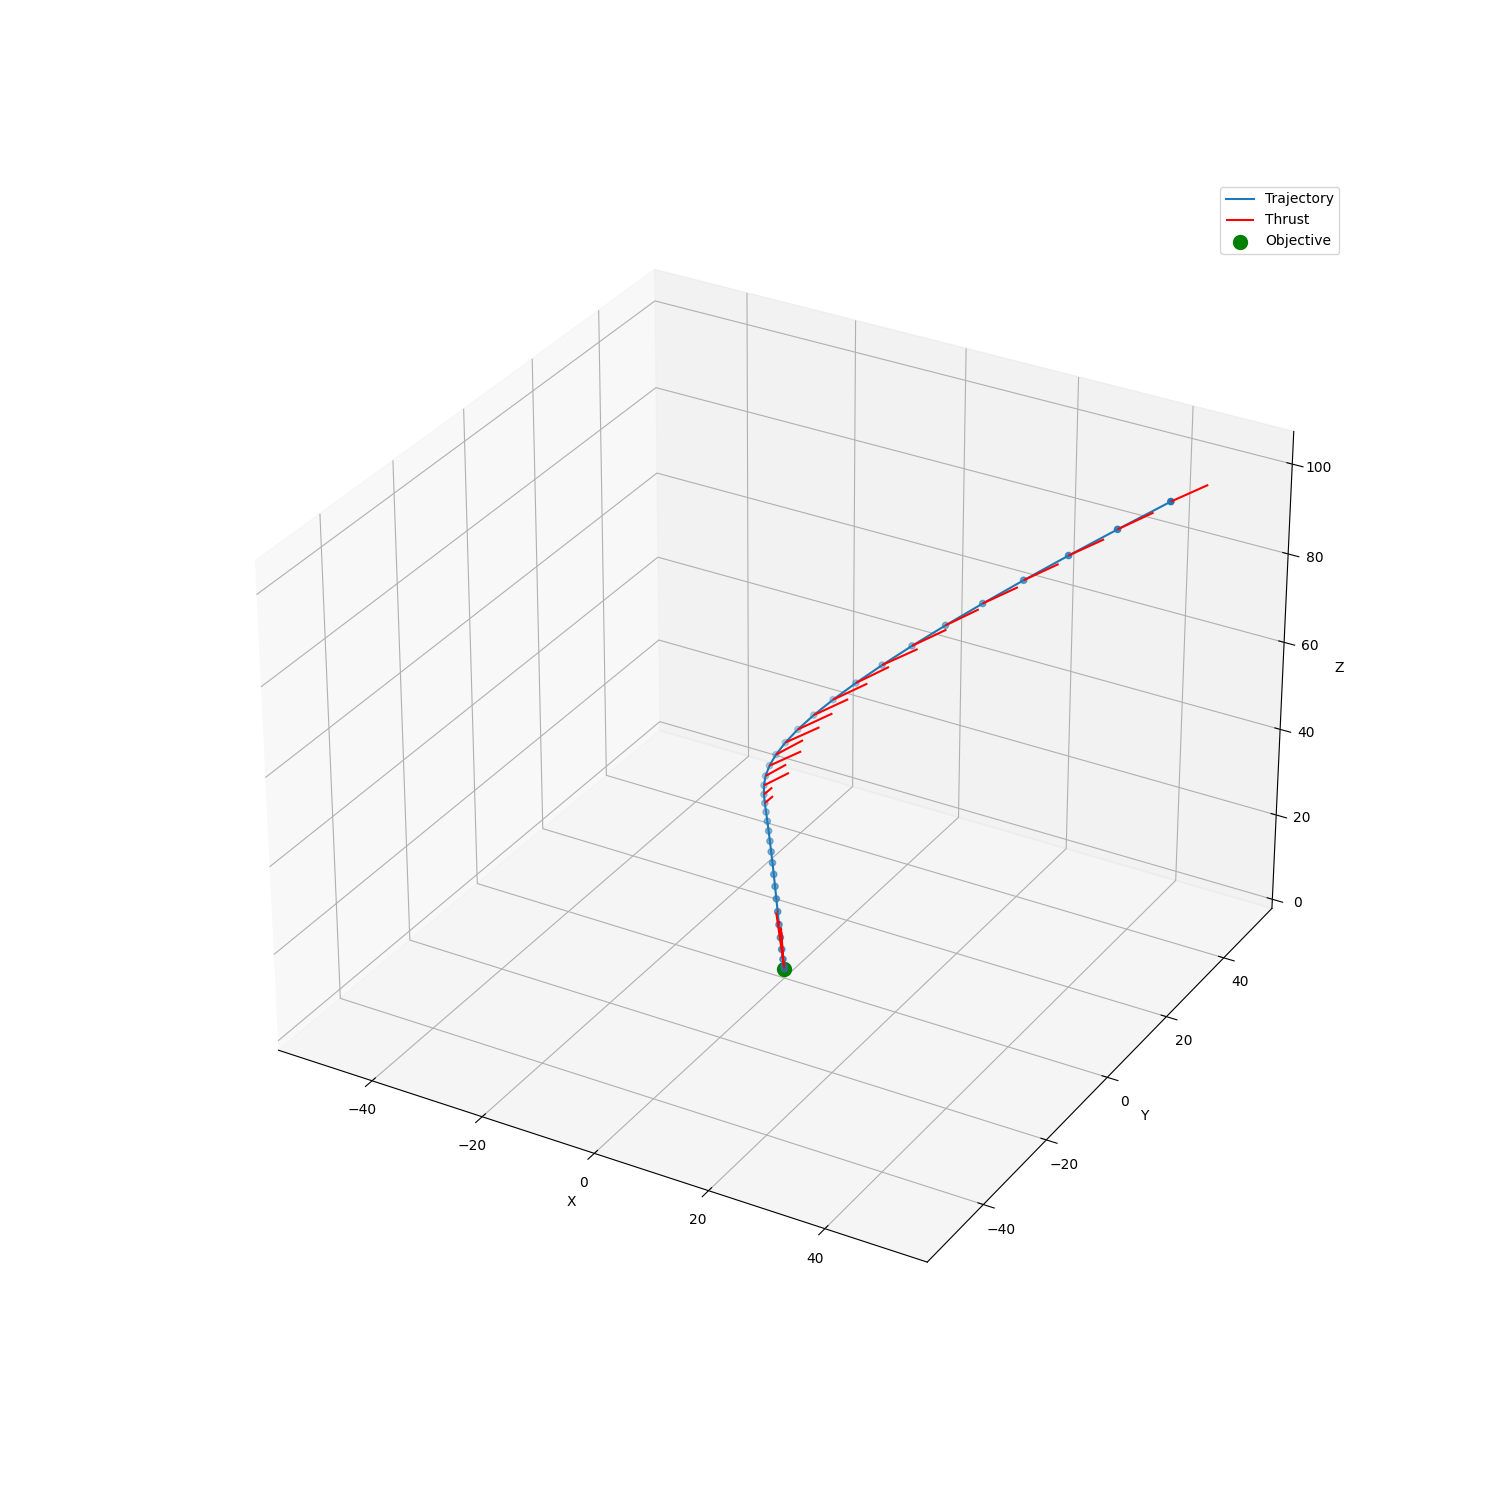

In [11]:
plot_location(f, p, v, lambd=1.)

In [12]:
d_loss = DistanceLoss()
c_loss = CostLoss(dt, gamma)

In [13]:
print(d_loss(f, p, v))
print(c_loss(f, p, v))

(tensor(0.0036, grad_fn=<LinalgVectorNormBackward0>), tensor(8.8834e-05, grad_fn=<LinalgVectorNormBackward0>))
tensor(191.0759, grad_fn=<MulBackward0>)


In [14]:
#import scienceplots
#plt.style.use('science')

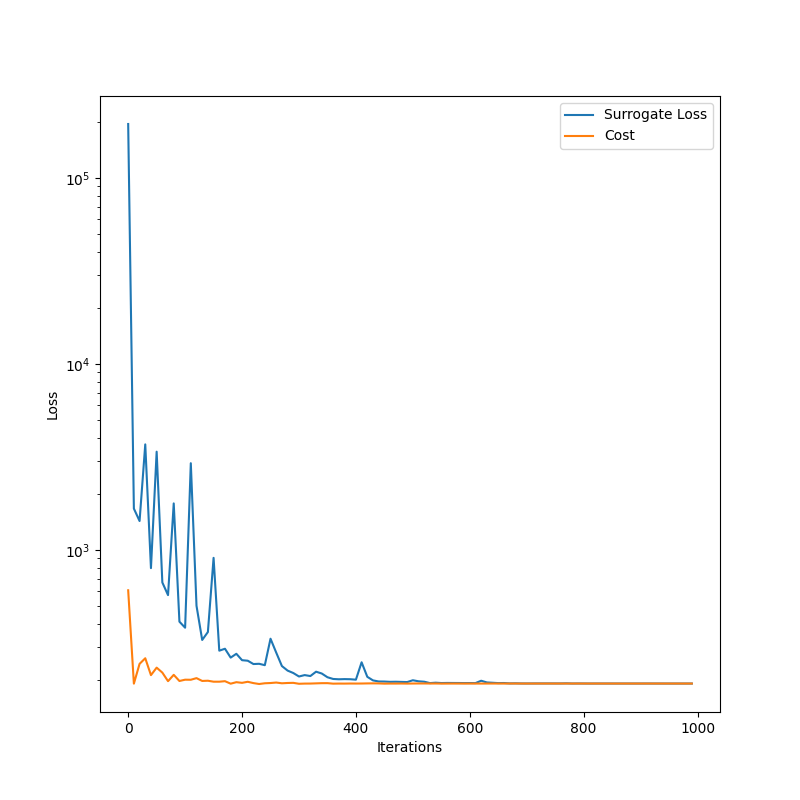

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(np.arange(0,1000,10), losses_1, label='Surrogate Loss')
ax.plot(np.arange(0,1000,10), losses_2, label='Cost')
#ax.set_title('Loss')
ax.set_yscale('log')

ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.legend()
plt.savefig("images/loss_v4.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [16]:
params_np = np.array(params)

In [17]:
params_np.shape

(100, 35, 3)

In [18]:
params_np[:10,0,0]

array([9.999998  , 0.99271154, 5.31014   , 4.861046  , 3.3620903 ,
       5.586054  , 4.945978  , 4.9094286 , 5.541455  , 5.443795  ],
      dtype=float32)

C:\Users\danie\AppData\Local\Temp\ipykernel_2084\1344267208.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, ticks=np.linspace(0, 1000, 11))


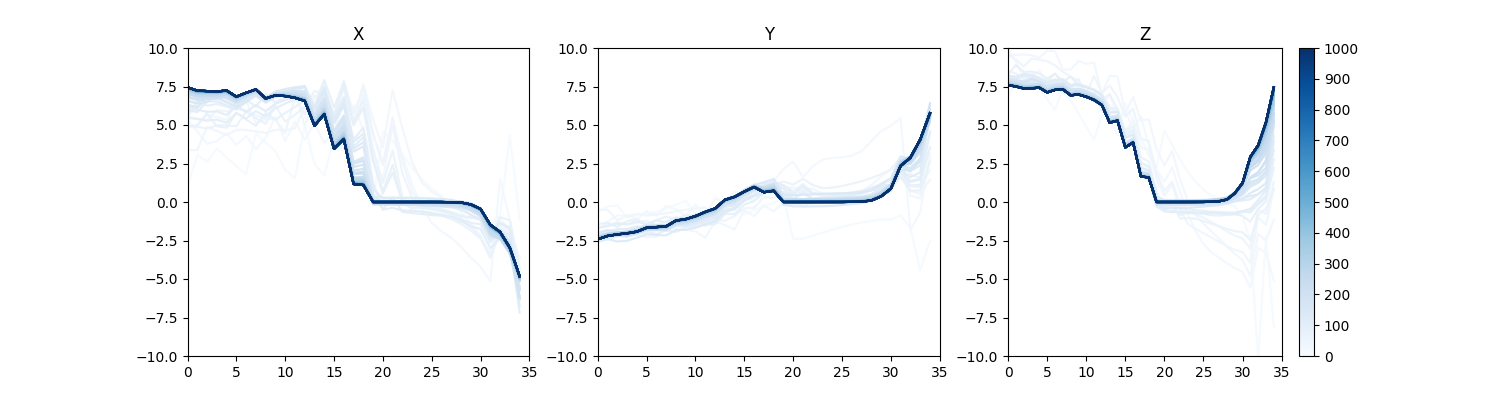

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

num = 100
colors = plt.cm.Blues(np.linspace(0,1,num))

for i in range(num):
    axs[0].plot(params_np[i,:,0], color=colors[i])
    axs[1].plot(params_np[i,:,1], color=colors[i])
    axs[2].plot(params_np[i,:,2], color=colors[i])
axs[0].set_title('X')
axs[1].set_title('Y')
axs[2].set_title('Z')

axs[0].set_ylim(-10, 10)
axs[1].set_ylim(-10, 10)
axs[2].set_ylim(-10, 10)

axs[0].set_xlim(0,35)
axs[1].set_xlim(0,35)
axs[2].set_xlim(0,35)

axs[2].xaxis.set_ticks(np.arange(0,40,5))

norm = mpl.colors.Normalize(vmin=0, vmax=1000)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])
  
plt.colorbar(sm, ticks=np.linspace(0, 1000, 11))


plt.savefig("images/fuerza_v4.pdf", format="pdf", bbox_inches="tight")
plt.show()

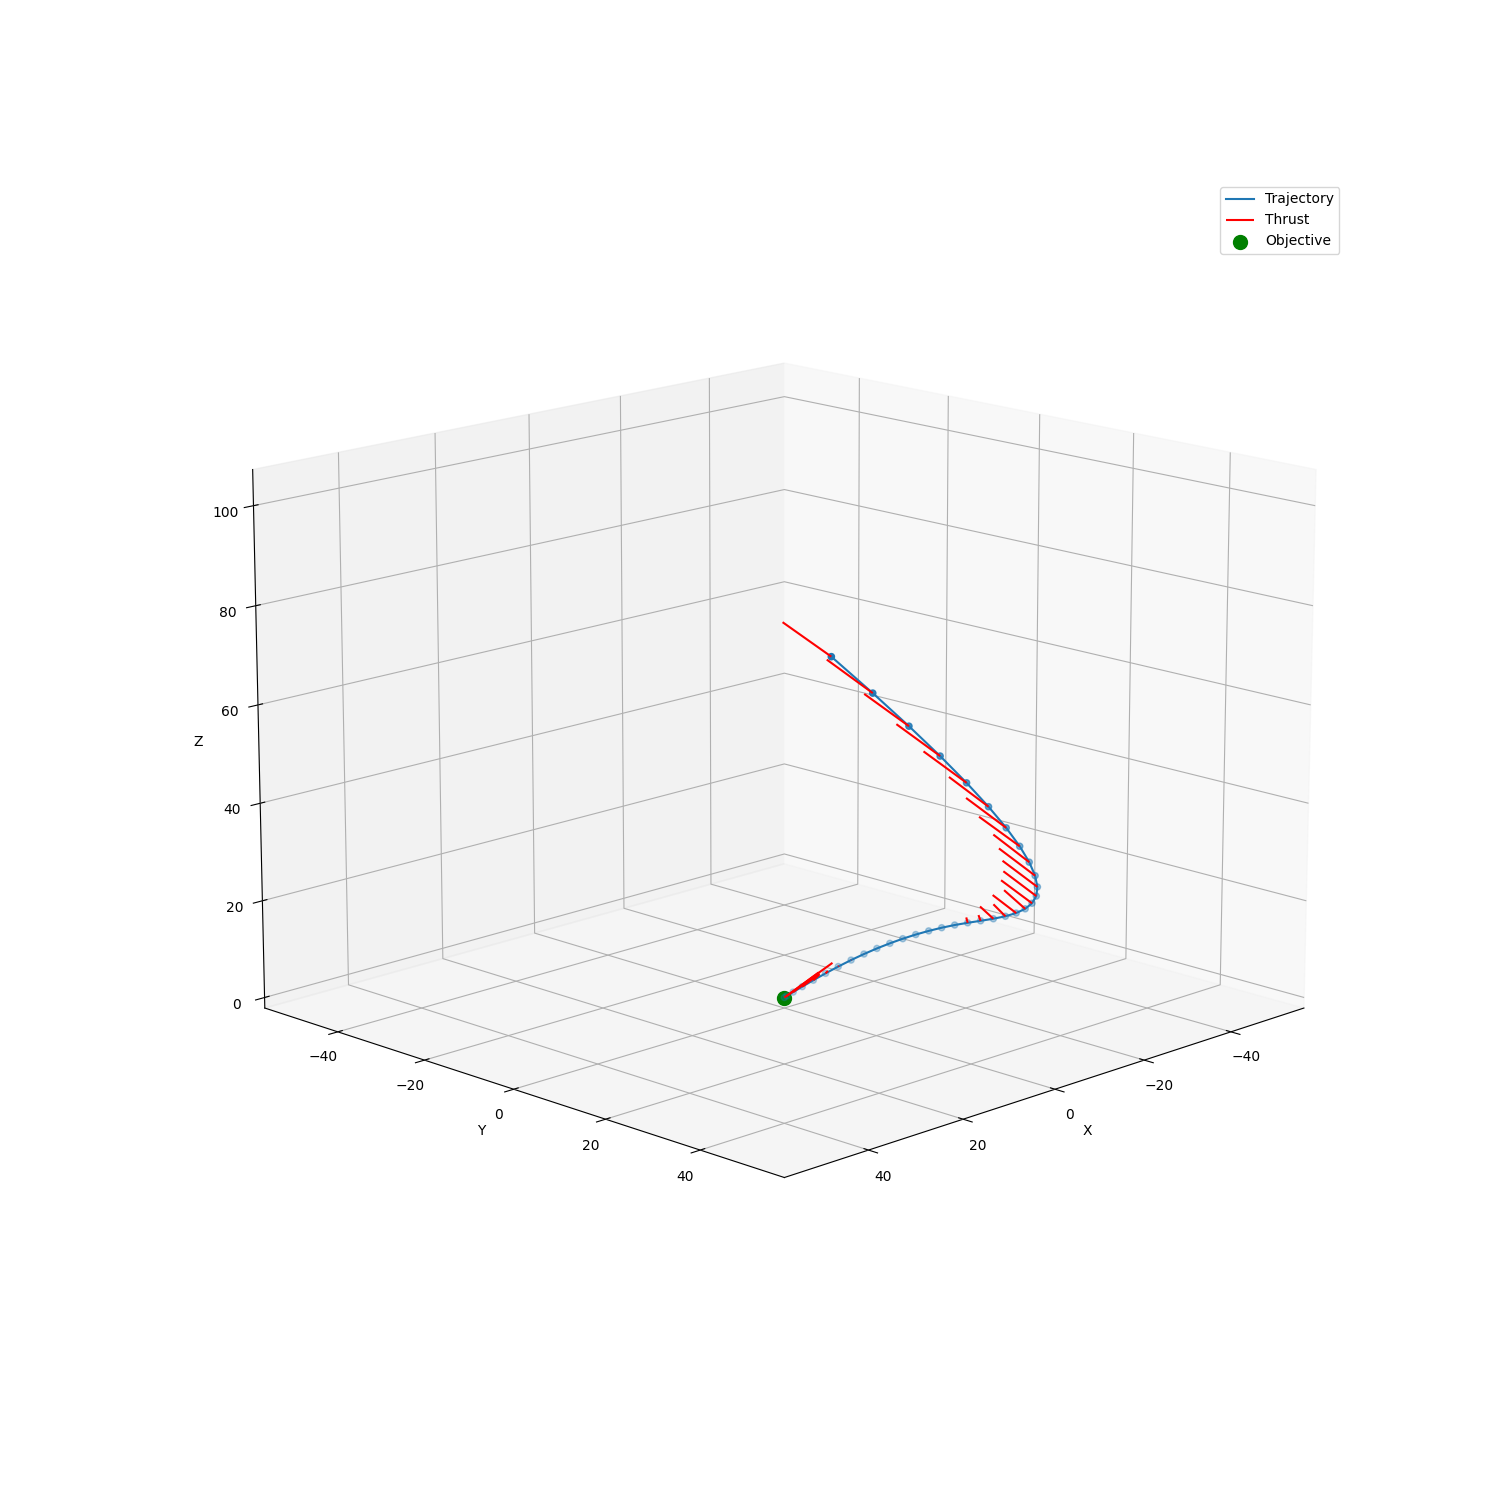

In [20]:
lambd = 1.
if isinstance(p, torch.Tensor) and isinstance(v, torch.Tensor):
    p = p.detach().numpy()
    v = v.detach().numpy()
    f = f.detach().numpy()

ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
ax.plot(p[:,0], p[:,1], p[:,2], zdir='z', label='Trajectory')
ax.scatter(p[:,0], p[:,1], p[:,2], zdir='z')

p2 = p + lambd*f
p_combine = np.stack([p, p2]).transpose((1, 0, 2))
lines = Line3DCollection(p_combine, color='r', label='Thrust')
ax.add_collection(lines)


ax.scatter(0,0,0, zdir='z', c='g', s=100, label='Objective')
ax.legend()
ax.set_xlim(-55, 55)
ax.set_ylim(-55, 55)
ax.set_zlim(0, 105)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(azim=45, elev=15)

plt.savefig("images/optimal_v2.pdf", format="pdf", bbox_inches="tight")
plt.show()

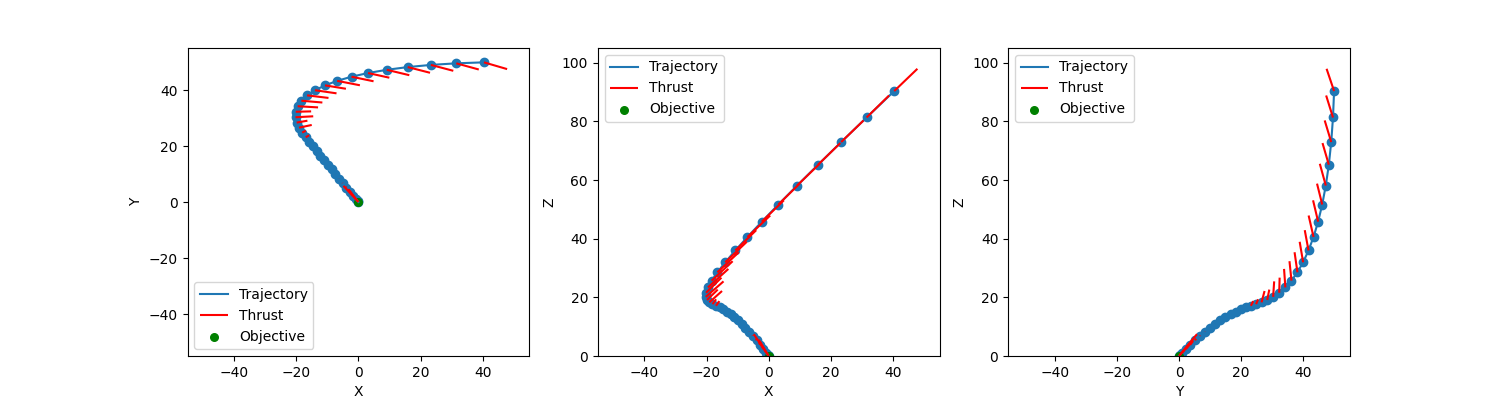

In [21]:
from matplotlib.collections import LineCollection
lambd = 1.
if isinstance(p, torch.Tensor) and isinstance(v, torch.Tensor):
    p = p.detach().numpy()
    v = v.detach().numpy()
    f = f.detach().numpy()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].plot(p[:,0], p[:,1], label='Trajectory')
axs[0].scatter(p[:,0], p[:,1])

p2 = p + lambd*f
p_combine = np.stack([p, p2])[:,:,[0,1]].transpose((1,0,2))
lines = LineCollection(p_combine, color='r', label='Thrust')
axs[0].add_collection(lines)
axs[0].scatter(0,0, c='g', s=30, label='Objective')
axs[0].legend()
axs[0].set_xlim(-55, 55)
axs[0].set_ylim(-55, 55)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')


axs[1].plot(p[:,0], p[:,2], label='Trajectory')
axs[1].scatter(p[:,0], p[:,2])
p2 = p + lambd*f
p_combine = np.stack([p, p2])[:,:,[0,2]].transpose((1,0,2))
lines = LineCollection(p_combine, color='r', label='Thrust')
axs[1].add_collection(lines)
axs[1].scatter(0,0, c='g', s=30, label='Objective')
axs[1].legend()
axs[1].set_xlim(-55, 55)
axs[1].set_ylim(0, 105)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Z')


axs[2].plot(p[:,1], p[:,2], label='Trajectory')
axs[2].scatter(p[:,1], p[:,2])
p2 = p + lambd*f
p_combine = np.stack([p, p2])[:,:,[1,2]].transpose((1,0,2))
lines = LineCollection(p_combine, color='r', label='Thrust')
axs[2].add_collection(lines)
axs[2].scatter(0,0, c='g', s=30, label='Objective')
axs[2].legend()
axs[2].set_xlim(-55, 55)
axs[2].set_ylim(0, 105)
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Z')

plt.savefig("images/optimal_X_Y.pdf", format="pdf", bbox_inches="tight")
plt.show()